# CONCRETE COMPRESSIVE STRENGTH
### An attempt to apply domain knowledge in feature engineering

## About the project and data
The project involves creating model(s) that will try to accurately predict the compressive strength of concrete. Since we are predicting a continuous variable, it is a regression problem.

Data Set Information:

The data has been sourced from UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

* Number of instances 1030
* Number of attributes 9
* 8 quantitative input variables (features)
* First 7 features are the constituents of conrete mix (in kg/m3) while the 8th one is the duration in days after which compressive strength test has been performed  
* 1 quantitative output variable (compressive strength)
* Missing attribute values: none



**The notebook is divided into two parts:**

*Part A: Predicting strength using the raw data as it is

*Part B: Predicting strength after attempting feature engineering

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [284]:
df=pd.read_csv('compresive_strength_concrete.csv')

In [285]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Reducing length of column names

In [286]:
col_names=['Cement',
       'Slag',
       'Fly Ash',
       'Water',
       'Superplasticizer',
       'Coarse Aggregate',
       'Fine Aggregate', 'Age',
       'Compressive Strength']

In [287]:
df.columns=col_names

In [8]:
df.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Explorataroy Data Analysis

(9, 0)

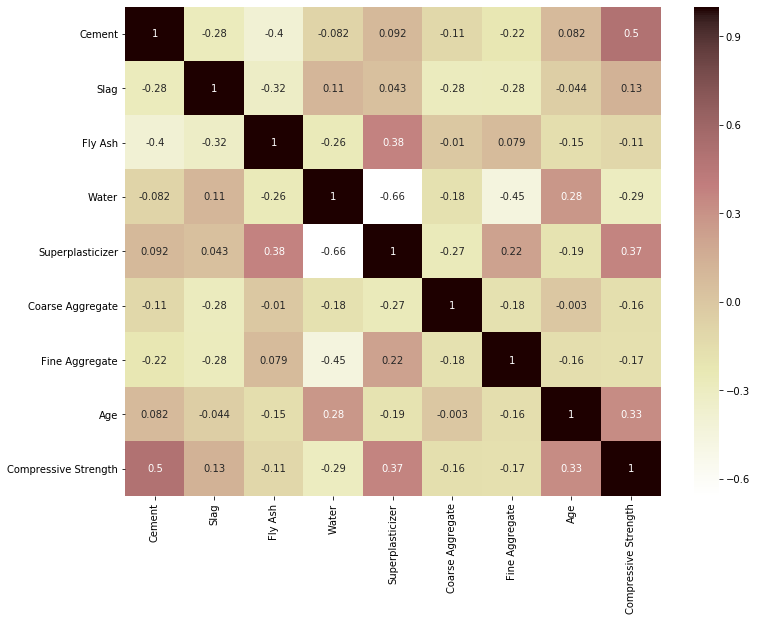

In [13]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),cmap='pink_r',annot=True)
plt.ylim(9,0)

#### From heatmap it can be inferred that there is high +ve correlation of compressive strength with cement, superplasticizer & age, and high -ve correlation with water content in the mix

In [14]:
df.corr()['Compressive Strength'].sort_values(ascending=False)

Compressive Strength    1.000000
Cement                  0.497832
Superplasticizer        0.366079
Age                     0.328873
Slag                    0.134829
Fly Ash                -0.105755
Coarse Aggregate       -0.164935
Fine Aggregate         -0.167241
Water                  -0.289633
Name: Compressive Strength, dtype: float64

# PART A
#### Applying models on the data as it is

## 1. Linear Regression

In [288]:
X=df.drop('Compressive Strength',axis=1)
y=df['Compressive Strength']

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [290]:
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [291]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [292]:
y_lr=lr.predict(X_test)

In [293]:
from sklearn import metrics

In [294]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_lr))
r2=np.sqrt(metrics.r2_score(y_test, y_lr))

In [295]:
print('Linear Regression')
print('RMSE:', rmse)
print('R2:', r2)

Linear Regression
RMSE: 9.796475901624357
R2: 0.7921825416098774


In [296]:
d={}
d_all={}

In [297]:
d['Linear']=(rmse,r2)
d_all['Linear']=(rmse,r2)

In [298]:
d

{'Linear': (9.796475901624357, 0.7921825416098774)}

## 2. Support Vector Machine

In [299]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [300]:
y_svr = svr.predict(X_test)

In [301]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_svr))
r2=np.sqrt(metrics.r2_score(y_test, y_svr))

In [302]:
print('Support Vector Machines')
print('RMSE:', rmse)
print('R2:', r2)

Support Vector Machines
RMSE: 9.431829879300633
R2: 0.8091747095701023


In [303]:
d['SVM']=(rmse,r2)
d_all['SVM']=(rmse,r2)

In [194]:
d

{'Linear': (9.796475901624357, 0.7921825416098774),
 'SVM': (9.431829879300633, 0.8091747095701023)}

## 3. Decision Tree

In [304]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [305]:
y_dtr=dtr.predict(X_test)

In [306]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_dtr))
r2=np.sqrt(metrics.r2_score(y_test, y_dtr))

In [307]:
print('Decision Tree')
print('RMSE:', rmse)
print('R2:', r2)

Decision Tree
RMSE: 6.575874005182796
R2: 0.9122415934564067


In [308]:
d['Dtree']=(rmse,r2)
d_all['Dtree']=(rmse,r2)

In [309]:
d_all

{'Linear': (9.796475901624357, 0.7921825416098774),
 'SVM': (9.431829879300633, 0.8091747095701023),
 'Dtree': (6.575874005182796, 0.9122415934564067)}

## 4. Random Forest

In [310]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [311]:
y_rfr=rfr.predict(X_test)

In [312]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_rfr))
r2=np.sqrt(metrics.r2_score(y_test, y_rfr))

In [313]:
print('Random Forest')
print('RMSE:', rmse)
print('R2:', r2)

Random Forest
RMSE: 5.6326446843582385
R2: 0.9364155872017629


In [314]:
d['RF']=(rmse,r2)
d_all['RF']=(rmse,r2)

In [315]:
d

{'Linear': (9.796475901624357, 0.7921825416098774),
 'SVM': (9.431829879300633, 0.8091747095701023),
 'Dtree': (6.575874005182796, 0.9122415934564067),
 'RF': (5.6326446843582385, 0.9364155872017629)}

In [316]:
results=pd.DataFrame(d,index=['RMSE', 'R2 score'])

In [317]:
results

,Linear,SVM,Dtree,RF
RMSE,9.796476,9.431830,6.575874,5.632645
R2 score,0.792183,0.809175,0.912242,0.936416


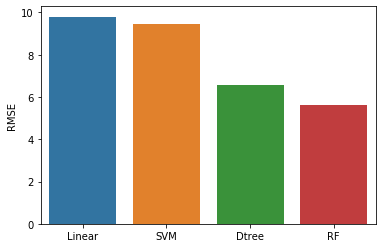

In [318]:
sns.barplot(y=results.iloc[0],x=results.columns)

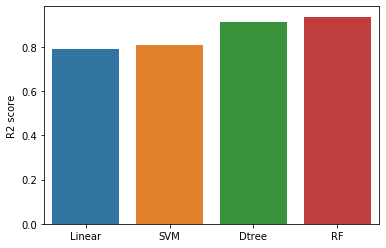

In [319]:
sns.barplot(y=results.iloc[1],x=results.columns)

# PART B
#### Applying models after attempting feature engineering
##### In part B, the aim is to improve the accuracy of prediction models by using domain knowledge

## 1. W/C Ratio

According to Abram's Law, the compressive strength of concrete is inversely proportional to the water to cement ratio (w/c) ratio. The following figure shows this relationship:

<img src='w_c_ratio.jpg' />

#### It is to be noted that in 'w/c' ratio 'c' includes all types of binding material not just cement.
#### Let's create a dataframe with W/C ratio as additional feature

In [320]:
df_wcratio=df.copy(deep=True)

In [321]:
df_wcratio['W/C']=df_wcratio['Water']/(df_wcratio['Cement']+df_wcratio['Slag']+df_wcratio['Fly Ash'])

In [322]:
df_wcratio.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength,W/C
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.30000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.30000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.48000
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.48000
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.58006


#### Exploring distribution of W/C values

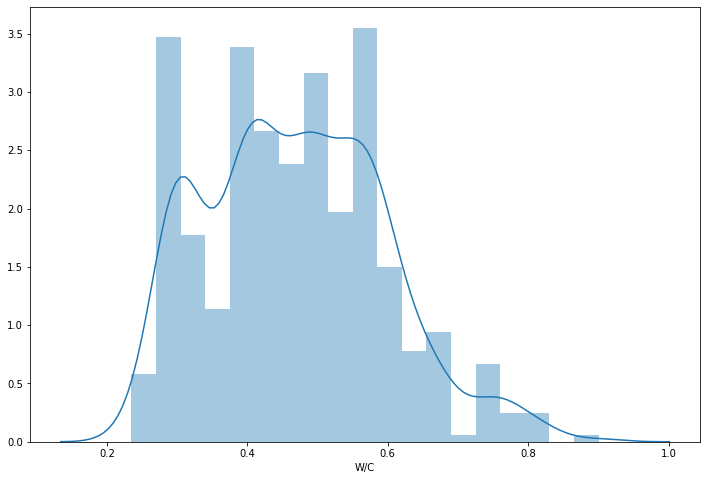

In [68]:
plt.figure(figsize=(12,8))
sns.distplot(df_wcratio['W/C'])

#### There is high variation in W/C values. The Bureau of Indian Standards IS-456 code recommends maximum value to be 0.55  and generally it is kept around 0.4. Taking this into consideration it can be inferred that for the given dataset w/c values are within in the pratical range but with outliers

<img src='w_c_ratio.png' />

(10, 0)

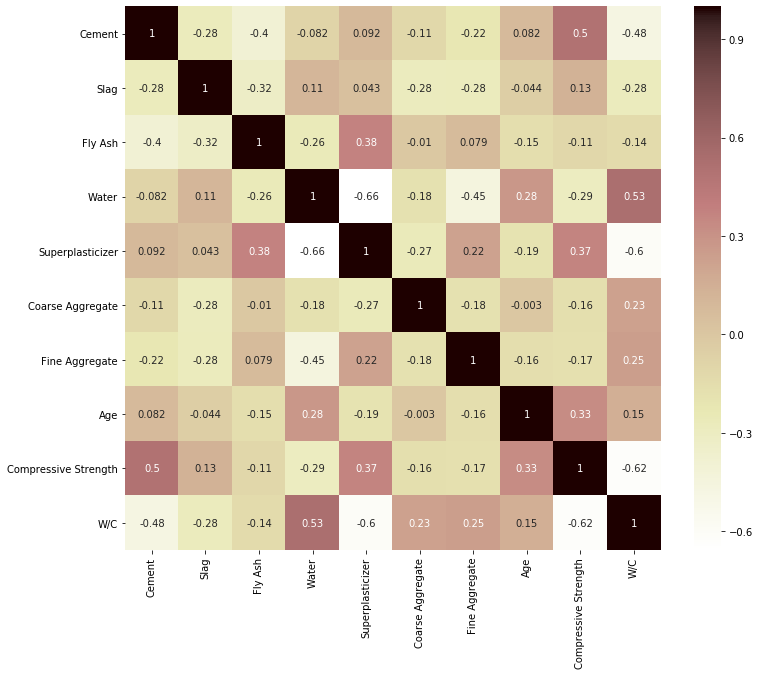

In [166]:
plt.figure(figsize=(12,10))
sns.heatmap(df_wcratio.corr(),cmap='pink_r',annot=True)
plt.ylim(10,0)

#### From heatmap it can be inferred that there is high -ve correlation of compressive strength with w/c ratio
### This new 'w/c' feature could help in better prediction. Let's verify:

## i. Linear Regression

In [323]:
X_wcratio=df_wcratio.drop('Compressive Strength',axis=1)
y_wcratio=df_wcratio['Compressive Strength']

In [324]:
X_train_wcratio, X_test_wcratio, y_train_wcratio, y_test_wcratio = train_test_split(X_wcratio, y_wcratio, test_size=0.2, random_state=42)

In [325]:
X_train_wcratio = sc.fit_transform(X_train_wcratio) 
X_test_wcratio = sc.transform(X_test_wcratio)

In [326]:
lr.fit(X_train_wcratio,y_train_wcratio)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [327]:
y_lr_wcratio=lr.predict(X_test_wcratio)

In [328]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_lr_wcratio))
r2=np.sqrt(metrics.r2_score(y_test, y_lr_wcratio))

In [329]:
print('Linear Regression W/C ratio')
print('RMSE:', rmse)
print('R2:', r2)

Linear Regression W/C ratio
RMSE: 9.707053891885385
R2: 0.796443042050887


In [330]:
d_wcratio={}
d_wcratio['Linear']=(rmse,r2)
d_all['Linear_W/C']=(rmse,r2)

In [331]:
d_wcratio

{'Linear': (9.707053891885385, 0.796443042050887)}

In [159]:
# d['Linear_W/C']=(rmse,r2)

## ii. Support Vector Machine

In [332]:
svr.fit(X_train_wcratio,y_train_wcratio)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [333]:
y_svr_wcratio=svr.predict(X_test_wcratio)

In [334]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_wcratio, y_svr_wcratio))
r2=np.sqrt(metrics.r2_score(y_test_wcratio, y_svr_wcratio))

In [335]:
print('Support Vector Machine W/C ratio')
print('RMSE:', rmse)
print('R2:', r2)

Support Vector Machine W/C ratio
RMSE: 9.248598769042921
R2: 0.817341514335798


In [336]:
d_wcratio['SVM']=(rmse,r2)

In [337]:
d_wcratio

{'Linear': (9.707053891885385, 0.796443042050887),
 'SVM': (9.248598769042921, 0.817341514335798)}

In [338]:
d_all['SVM_W/C']=(rmse,r2)

In [339]:
d_all

{'Linear': (9.796475901624357, 0.7921825416098774),
 'SVM': (9.431829879300633, 0.8091747095701023),
 'Dtree': (6.575874005182796, 0.9122415934564067),
 'RF': (5.6326446843582385, 0.9364155872017629),
 'Linear_W/C': (9.707053891885385, 0.796443042050887),
 'SVM_W/C': (9.248598769042921, 0.817341514335798)}

## iii. Decision Tree

In [340]:
dtr.fit(X_train_wcratio,y_train_wcratio)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [346]:
y_dtr_wcratio=dtr.predict(X_test_wcratio)

In [347]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_wcratio, y_dtr_wcratio))
r2=np.sqrt(metrics.r2_score(y_test_wcratio, y_dtr_wcratio))

In [348]:
print('Decision Tree W/C ratio')
print('RMSE:', rmse)
print('R2:', r2)

Decision Tree W/C ratio
RMSE: 6.098074620539659
R2: 0.9250326981263018


In [344]:
d_wcratio['Dtree']=(rmse,r2)

In [345]:
d_wcratio

{'Linear': (9.707053891885385, 0.796443042050887),
 'SVM': (9.248598769042921, 0.817341514335798),
 'Dtree': (6.098074620539659, 0.9250326981263018)}

In [349]:
d_all['DTree_W/C']=(rmse,r2)

## iv. Random Forest

In [350]:
rfr.fit(X_train_wcratio,y_train_wcratio)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [351]:
y_rfr_wcratio=rfr.predict(X_test_wcratio)

In [352]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_wcratio, y_rfr_wcratio))
r2=np.sqrt(metrics.r2_score(y_test_wcratio, y_rfr_wcratio))

In [353]:
print('Random Forest without slag')
print('RMSE:', rmse)
print('R2:', r2)

Random Forest without slag
RMSE: 4.839750274645072
R2: 0.9534666381037517


In [354]:
d_wcratio['RF']=(rmse,r2)

In [355]:
d_wcratio

{'Linear': (9.707053891885385, 0.796443042050887),
 'SVM': (9.248598769042921, 0.817341514335798),
 'Dtree': (6.098074620539659, 0.9250326981263018),
 'RF': (4.839750274645072, 0.9534666381037517)}

In [356]:
d_all['RF_W/C']=(rmse,r2)

In [357]:
# results_wcratio=pd.DataFrame(d_wcratio,index=['RMSE W/C', 'R2 score W/C'])
results_wcratio=pd.DataFrame(d_wcratio,index=['RMSE', 'R2 score'])

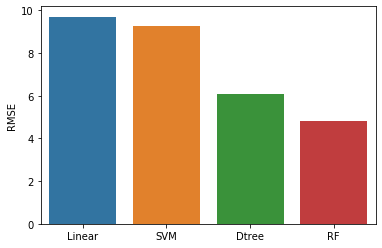

In [358]:
sns.barplot(y=results_wcratio.iloc[0],x=results_wcratio.columns)

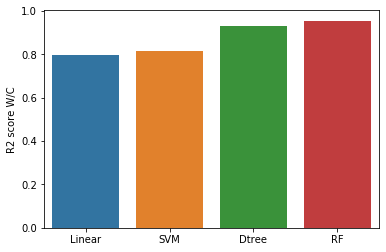

In [135]:
sns.barplot(y=results_wcratio.iloc[1],x=results_wcratio.columns)

In [149]:
# all_results=pd.concat([results,results_wcratio],axis=1)

In [150]:
# all_results

,Linear,SVM,Dtree,RF,Linear,SVM,Dtree,RF
RMSE,9.796476,9.431830,6.617656,5.565790,9.707054,9.248599,5.904185,4.766078
R2 score,0.792183,0.809175,0.911068,0.937966,0.796443,0.817342,0.929901,0.954906


## 2. Binders (Cement, Slag and Fly Ash)

From the civil engineering domain knowledge it is known that **Cement, Slag and Fly Ash are collectively called as binders** which bind together the aggregates.

**Blast Furnace Slag (or Fly Ash) as an alternative to Cement**
Blast Furnace Slag (or Fly Ash) can be used as an alternative to Cement. This is also evident in our data.
But certain amount of cement is always added in the mix.

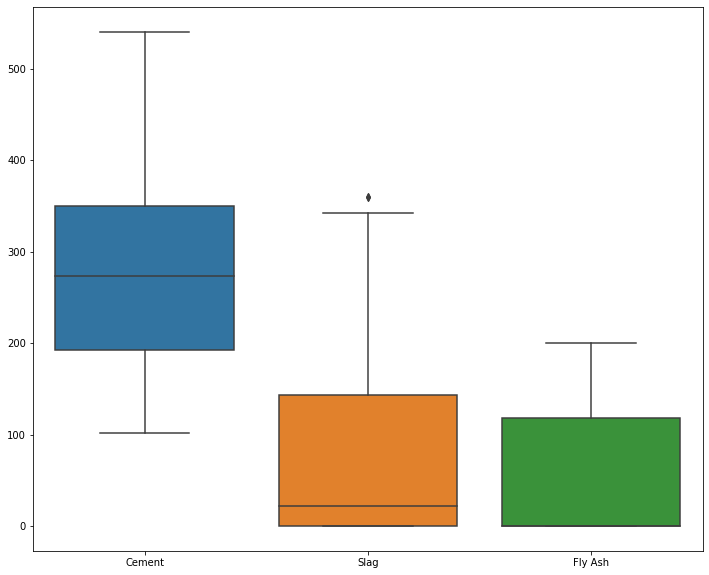

In [37]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df[['Cement','Slag','Fly Ash']])

### **It is clearly evident that in almost half of our dataset, neither slag nor fly ash has been used to prepare concrete mix**

In [38]:
df[['Cement','Slag','Fly Ash']].describe()

,Cement,Slag,Fly Ash
count,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350
std,104.506364,86.279342,63.997004
min,102.000000,0.000000,0.000000
25%,192.375000,0.000000,0.000000
50%,272.900000,22.000000,0.000000
75%,350.000000,142.950000,118.300000
max,540.000000,359.400000,200.100000


#### Using data without any Blast Furnace Slag

In [359]:
df_no_slag=df[df['Slag']==0]

In [360]:
df_no_slag.describe()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
count,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,298.076221,0.0,62.586412,181.880255,5.017834,1004.043737,793.170064,47.842887,31.599490
std,100.691529,0.0,64.882753,18.009486,5.494719,74.173283,73.855279,65.529210,14.743414
min,134.700000,0.0,0.000000,140.000000,0.000000,801.000000,594.000000,1.000000,6.270000
25%,229.700000,0.0,0.000000,167.550000,0.000000,961.200000,758.300000,14.000000,19.730000
50%,281.000000,0.0,90.000000,186.000000,4.600000,1006.000000,792.000000,28.000000,31.350000
75%,349.000000,0.0,118.300000,192.000000,9.500000,1056.000000,850.000000,56.000000,40.865000
max,540.000000,0.0,200.100000,228.000000,28.200000,1125.000000,945.000000,365.000000,79.990000


### We are left with 471 instances. Let's use only this data (without slag) and verify whether our models give better prediction

## i. Linear Regression

In [361]:
X_no_slag=df_no_slag.drop('Compressive Strength',axis=1)
y_no_slag=df_no_slag['Compressive Strength']

In [362]:
X_train_no_slag, X_test_no_slag, y_train_no_slag, y_test_no_slag = train_test_split(X_no_slag, y_no_slag, test_size=0.2, random_state=42)

In [363]:
X_train_no_slag = sc.fit_transform(X_train_no_slag) 
X_test_no_slag = sc.transform(X_test_no_slag)

In [364]:
lr.fit(X_train_no_slag,y_train_no_slag)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [366]:
y_lr_no_slag=lr.predict(X_test_no_slag)

In [367]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_no_slag, y_lr_no_slag))
r2=np.sqrt(metrics.r2_score(y_test_no_slag, y_lr_no_slag))

In [368]:
print('Linear Regression without slag')
print('RMSE:', rmse)
print('R2:', r2)

Linear Regression without slag
RMSE: 8.910912098921019
R2: 0.8421014205007318


In [369]:
d_no_slag={}
d_no_slag['Linear']=(rmse,r2)

In [370]:
d_all['Linear_no_slag']=(rmse,r2)

In [371]:
d_all

{'Linear': (9.796475901624357, 0.7921825416098774),
 'SVM': (9.431829879300633, 0.8091747095701023),
 'Dtree': (6.575874005182796, 0.9122415934564067),
 'RF': (5.6326446843582385, 0.9364155872017629),
 'Linear_W/C': (9.707053891885385, 0.796443042050887),
 'SVM_W/C': (9.248598769042921, 0.817341514335798),
 'DTree_W/C': (6.098074620539659, 0.9250326981263018),
 'RF_W/C': (4.839750274645072, 0.9534666381037517),
 'Linear_no_slag': (8.910912098921019, 0.8421014205007318)}

## ii. Support Vector Machine

In [372]:
svr.fit(X_train_no_slag,y_train_no_slag)

C:\Users\ravi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [373]:
y_svr_no_slag=svr.predict(X_test_no_slag)

In [374]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_no_slag, y_svr_no_slag))
r2=np.sqrt(metrics.r2_score(y_test_no_slag, y_svr_no_slag))

In [375]:
print('Support Vector Machine without slag')
print('RMSE:', rmse)
print('R2:', r2)

Support Vector Machine without slag
RMSE: 11.857275404118713
R2: 0.6964108773841797


In [376]:
d_no_slag['SVM']=(rmse,r2)
d_all['SVM_no_slag']=(rmse,r2)

## iii. Decision Tree

In [377]:
dtr.fit(X_train_no_slag,y_train_no_slag)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [378]:
y_dtr_no_slag=dtr.predict(X_test_no_slag)

In [379]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_no_slag, y_dtr_no_slag))
r2=np.sqrt(metrics.r2_score(y_test_no_slag, y_dtr_no_slag))

In [380]:
print('Decision Tree without slag')
print('RMSE:', rmse)
print('R2:', r2)

Decision Tree without slag
RMSE: 6.004298460269942
R2: 0.9316328619944135


In [381]:
d_no_slag['DTree']=(rmse,r2)
d_all['DTree_no_slag']=(rmse,r2)

## iv. Random Forest

In [382]:
rfr.fit(X_train_no_slag,y_train_no_slag)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [383]:
y_rfr_no_slag=rfr.predict(X_test_no_slag)

In [384]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_no_slag, y_rfr_no_slag))
r2=np.sqrt(metrics.r2_score(y_test_no_slag, y_rfr_no_slag))

In [385]:
print('Random Forest without slag')
print('RMSE:', rmse)
print('R2:', r2)

Random Forest without slag
RMSE: 4.657420571269485
R2: 0.9594487308805749


In [386]:
d_no_slag['RF']=(rmse,r2)
d_all['RF_no_slag']=(rmse,r2)

In [388]:
d_no_slag

{'Linear': (8.910912098921019, 0.8421014205007318),
 'SVM': (11.857275404118713, 0.6964108773841797),
 'DTree': (6.004298460269942, 0.9316328619944135),
 'RF': (4.657420571269485, 0.9594487308805749)}

In [424]:
results_no_slag=pd.DataFrame(d_no_slag,index=['RMSE', 'R2 score'])

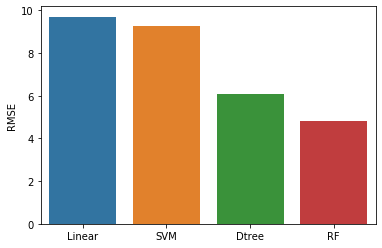

In [425]:
sns.barplot(y=results_wcratio.iloc[0],x=results_wcratio.columns)

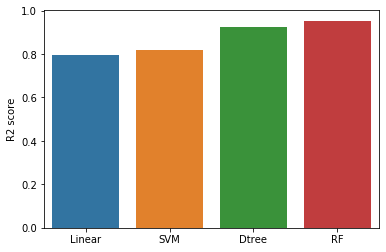

In [426]:
sns.barplot(y=results_wcratio.iloc[1],x=results_wcratio.columns)

## 3. Age

#### Age as a feature represents the total duration between the time of preparation of concrete specimen and the time of compressive testing.

#### Exploring distribution of Age

In [111]:
df['Age'].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: Age, dtype: int64

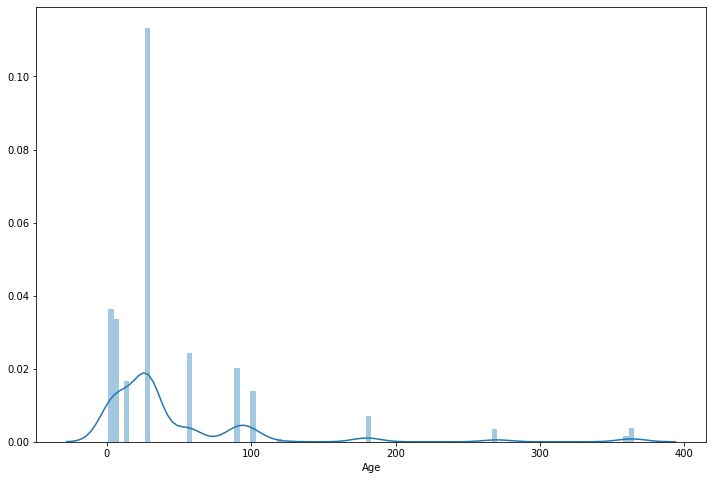

In [172]:
plt.figure(figsize=(12,8))
sns.distplot(df['Age'],bins=100)

#### It is evident that most of the tests are done within 28 days. In fact IS-456 recommends concrete testing after 3, 7 and 28 days.

### Let's use only the data with age less than or equal to 28 days and verify whether our models give better prediction

In [389]:
df_age=df[df['Age']<=28]

In [390]:
df_age.describe()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,276.091455,77.938184,56.085447,181.094793,6.336983,970.374366,773.436315,18.763685,31.035407
std,105.065864,88.461101,64.615246,19.442899,5.823588,80.987251,75.668785,10.909764,15.233631
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,182.000000,0.000000,0.000000,167.000000,0.000000,923.000000,730.400000,7.000000,19.420000
50%,265.000000,24.000000,0.000000,185.000000,6.700000,967.100000,778.000000,28.000000,29.730000
75%,349.000000,148.600000,118.300000,192.000000,10.200000,1030.000000,821.000000,28.000000,39.460000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,28.000000,81.750000


### We are left with 749 instances

## i. Linear Regression

In [391]:
X_age=df_age.drop('Compressive Strength',axis=1)
y_age=df_age['Compressive Strength']

In [392]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.2, random_state=42)

In [393]:
X_train_age = sc.fit_transform(X_train_age) 
X_test_age = sc.transform(X_test_age)

In [394]:
lr.fit(X_train_age,y_train_age)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [395]:
y_lr_age=lr.predict(X_test_age)

In [397]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_age, y_lr_age))
r2=np.sqrt(metrics.r2_score(y_test_age, y_lr_age))

In [398]:
print('Linear Regression age upto 28 days')
print('RMSE:', rmse)
print('R2:', r2)

Linear Regression age upto 28 days
RMSE: 7.479897450640759
R2: 0.8963275376730695


In [399]:
d_age={}
d_age['Linear']=(rmse,r2)
d_all['Linear_age']=(rmse,r2)

## ii. Support Vector Machine

In [400]:
svr.fit(X_train_age,y_train_age)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [401]:
y_svr_age=svr.predict(X_test_age)

In [402]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_age, y_svr_age))
r2=np.sqrt(metrics.r2_score(y_test_age, y_svr_age))

In [403]:
print('Support Vector Machine age upto 28 days')
print('RMSE:', rmse)
print('R2:', r2)

Support Vector Machine age upto 28 days
RMSE: 10.599725972061018
R2: 0.7779474101735695


In [405]:
d_age['SVM']=(rmse,r2)
d_all['SVM_age']=(rmse,r2)

## iii. Decision Tree

In [406]:
dtr.fit(X_train_age,y_train_age)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [407]:
y_dtr_age=dtr.predict(X_test_age)

In [408]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_age, y_dtr_age))
r2=np.sqrt(metrics.r2_score(y_test_age, y_dtr_age))

In [409]:
print('Decision Tree age upto 28 days')
print('RMSE:', rmse)
print('R2:', r2)

Decision Tree age upto 28 days
RMSE: 10.643725890557935
R2: 0.7758335676192222


In [410]:
d_age['DTree']=(rmse,r2)
d_all['DTree_age']=(rmse,r2)

## iv. Random Forest

In [419]:
rfr.fit(X_train_age,y_train_age)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [420]:
y_rfr_age=rfr.predict(X_test_age)

In [421]:
rmse=np.sqrt(metrics.mean_squared_error(y_test_age, y_rfr_age))
r2=np.sqrt(metrics.r2_score(y_test_age, y_rfr_age))

In [422]:
print('Random Forest age upto 28 days')
print('RMSE:', rmse)
print('R2:', r2)

Random Forest age upto 28 days
RMSE: 7.000855267167122
R2: 0.9098232671563582


In [423]:
d_age['RF']=(rmse,r2)
d_all['RF_age']=(rmse,r2)

In [427]:
results_age=pd.DataFrame(d_age,index=['RMSE', 'R2 score'])

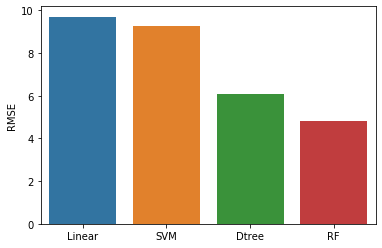

In [429]:
sns.barplot(y=results_wcratio.iloc[0],x=results_wcratio.columns)

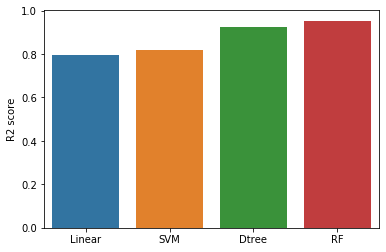

In [430]:
sns.barplot(y=results_wcratio.iloc[1],x=results_wcratio.columns)

## COMPARISON OF PREDICTIONS

In [431]:
all_results=pd.DataFrame(d_all,index=['RMSE', 'R2 score'])

In [437]:
all_results.columns

Index(['Linear', 'SVM', 'Dtree', 'RF', 'Linear_W/C', 'SVM_W/C', 'DTree_W/C',
       'RF_W/C', 'Linear_no_slag', 'SVM_no_slag', 'DTree_no_slag',
       'RF_no_slag', 'Linear_age', 'SVM_age', 'DTree_age', 'RF_age'],
      dtype='object')

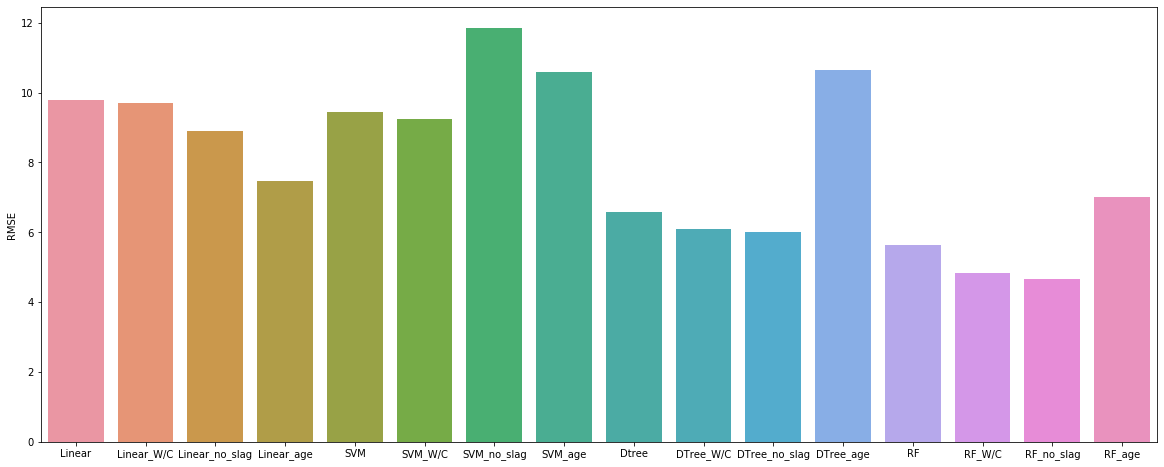

In [453]:
plt.figure(figsize=(20,8))
sns.barplot(y=all_results.iloc[0],x=all_results.columns,order=['Linear','Linear_W/C', 'Linear_no_slag', 'Linear_age', 'SVM', 'SVM_W/C', 'SVM_no_slag', 'SVM_age', 
                                                               'Dtree', 'DTree_W/C', 'DTree_no_slag', 'DTree_age', 'RF', 'RF_W/C', 'RF_no_slag', 'RF_age'])

In [456]:
e=all_results.drop(['SVM_no_slag','SVM_age','DTree_age','RF_age'],axis=1)

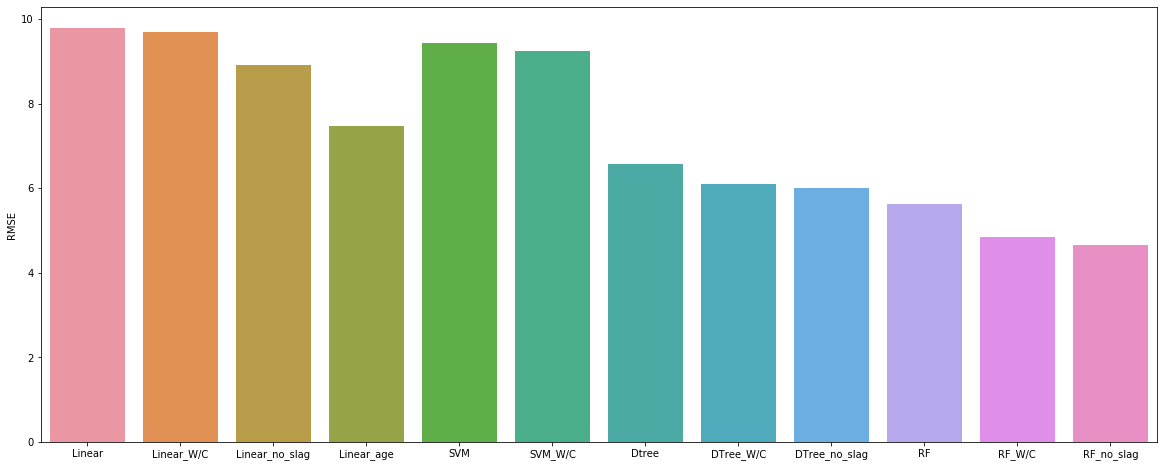

In [458]:
plt.figure(figsize=(20,8))
sns.barplot(y=e.iloc[0],x=e.columns, order=['Linear','Linear_W/C', 'Linear_no_slag', 'Linear_age', 'SVM', 'SVM_W/C',   
                                                               'Dtree', 'DTree_W/C', 'DTree_no_slag', 'RF', 'RF_W/C', 'RF_no_slag', ])

## We can conclude that by introducing feature engineering better predictions are obtained from models.